In [1]:
# Lets import the necessary libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['2014-2018 Sources of Energy.csv']


In [2]:
df = pd.read_csv('2014-2018 Sources of Energy.csv')

In [3]:
# Lets check out the data
df.head(10)

,Sl.No,State/UT,Wind,Solar,Small Hydel,Bio-Power,Total,Year
0,1,Chandigarh,0.00,2.23,0.00,0.00,2.23,2014-15
1,2,Delhi,0.00,3.18,0.00,113.44,116.63,2014-15
2,3,Haryana,0.00,10.36,280.96,179.36,470.69,2014-15
3,4,Himachal Pradesh,0.00,0.00,1685.08,0.00,1685.08,2014-15
4,5,Jammu And Kashmir,0.00,0.00,313.23,0.00,313.23,2014-15
5,6,Punjab,0.00,129.89,543.53,485.87,1159.29,2014-15
6,7,Rajasthan,4053.85,1259.19,5.30,278.24,5596.57,2014-15
7,8,Uttar Pradesh,0.00,20.13,30.30,3090.27,3140.70,2014-15
8,9,Uttarakhand,0.00,11.63,565.25,87.50,664.38,2014-15
9,10,NTPC (Dadri/FBD/Unchahar/Singrauli/Bhadla),0.00,22.90,0.00,0.00,22.90,2014-15


In [4]:
'''
Same state had different spellings for different years
The below needs to be cleaned up
'''
df.replace('Andaman Nicobar','Andaman And Nicobar',inplace=True)
df.replace('DVC','Damodar Valley Corporation',inplace=True)
df.replace('Daman and Diu','Daman And Diu',inplace=True)
df.replace('NTPC Andman/Talcher','NTPC Andaman/Talcher',inplace=True)
df.replace('Jammu and Kashmir','Jammu And Kashmir',inplace=True)
df.replace('Dadra and Nagar Haveli','Dadra And Nagar Haveli',inplace=True)
df.replace('Uttarakhand.','Uttarakhand',inplace=True)

In [5]:
# Lets check the power generation over the years
total_by_year_df = df.groupby("Year",as_index=False).sum()
total_by_year_df.head(5)

,Year,Sl.No,Wind,Solar,Small Hydel,Bio-Power,Total
0,2014-15,820,33768.31,4583.39,8059.49,15358.12,61769.34
1,2015-16,2420,33029.38,7431.92,8354.53,16949.03,65764.83
2,2016-17,4020,46004.34,13148.53,7672.67,14371.81,81197.34
3,2017-18,5620,47482.25,19501.55,6814.86,11508.92,85307.57


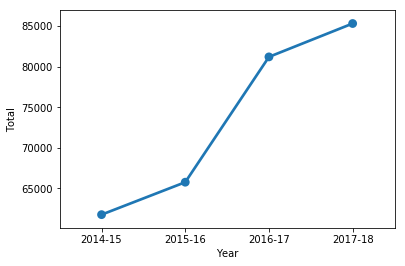

In [6]:
# Total enegery generation from renewable sources over the year
sns.pointplot(x="Year",y="Total",data=total_by_year_df);

> it is great to see that the power generated from renewable sources has been increasing over the years. **From 2015 onwards there has been a sharp increase in power generation from renewable sources.**

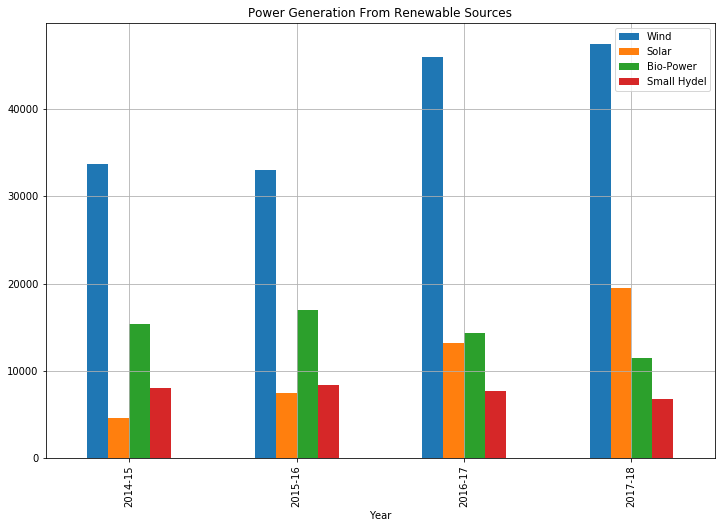

In [7]:
'''
Power generated from various sources over the years
'''
total_by_year_df.plot(x="Year", y=["Wind", "Solar", "Bio-Power","Small Hydel"], kind="bar", figsize=(12,8), title="Power Generation From Renewable Sources", grid=True);

Interesting Observations from the above plot:
* Power generated from wind is higher than any other sources
* Solar adoption has been increasing at a steady rate over the years
* Power generated from Small Hydro Electric power stations has been declining
* Power Generated from Bio Sources has been declining over the years

> **Wind and Solar are the most popular renewable sources of power generation**

In [8]:
# new df. Group by State and Year
total_by_state_year_df = df.groupby( ["State/UT","Year"],as_index=False).sum()
total_by_state_year_df.head(8)

,State/UT,Year,Sl.No,Wind,Solar,Small Hydel,Bio-Power,Total
0,Andaman And Nicobar,2014-15,25,0.00,0.00,0.47,0.00,0.47
1,Andaman And Nicobar,2015-16,65,0.00,6.26,12.46,0.00,18.72
2,Andaman And Nicobar,2016-17,105,0.00,6.17,13.86,0.00,20.03
3,Andaman And Nicobar,2017-18,145,0.00,5.39,11.37,0.00,16.77
4,Andhra Pradesh,2014-15,19,1675.82,159.77,274.61,600.85,2711.06
5,Andhra Pradesh,2015-16,59,2013.04,282.67,103.10,707.80,3106.61
6,Andhra Pradesh,2016-17,99,3187.85,1599.78,168.75,526.88,5483.26
7,Andhra Pradesh,2017-18,139,5576.89,2892.76,139.77,290.16,8899.59


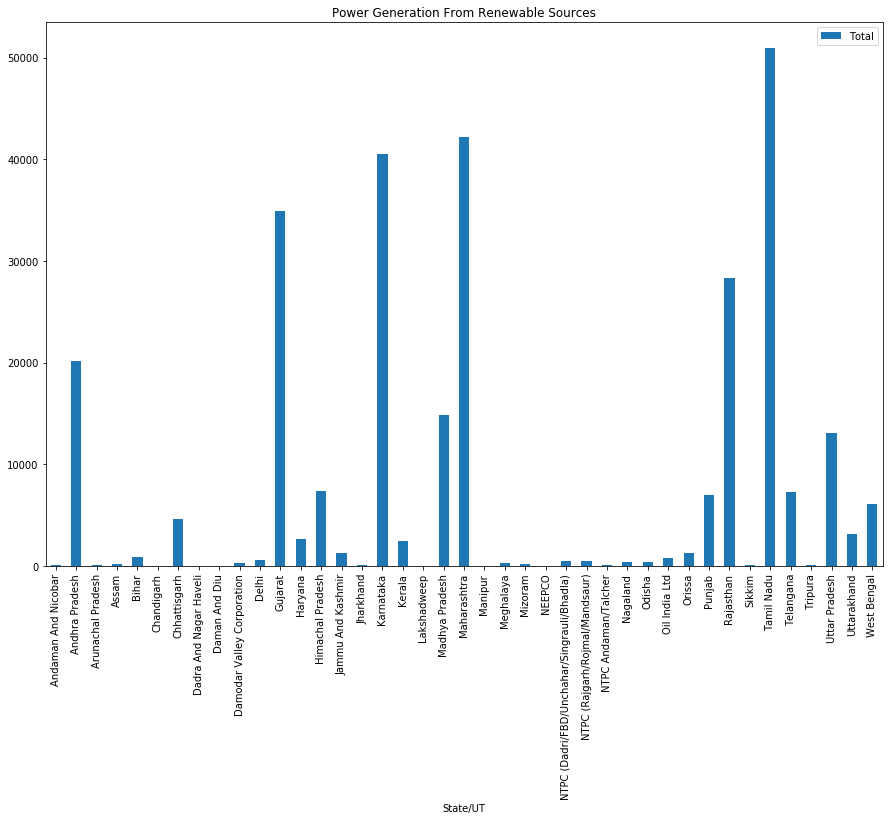

In [9]:
'''
Power generated by state or union territory from renewables sources for the 4 year period
'''
total_by_state_df = df.groupby( ["State/UT"],as_index=False).sum()
total_by_state_df.plot(x="State/UT", y=["Total"], kind="bar", figsize=(15,10), title="Power Generation From Renewable Sources");

In the above plot we see the total power generated fro the time period by different states. This includes power generated from all the renewable sources of energy.
The top 6 states are
1. Tamil Nadu
2. Maharashtra
3. Karnataka
4. Gujarat
5. Rajasthan
6. Andhra Pradesh

In [10]:
'''
Lets look at the top 6 states.
Total Power Generated from Renewable Sources grouped by year and state
We are only considering the top 6 states here
'''
#top_states_by_year_grouped_df = top_states_by_year_df.groupby( ['Year','State/UT']).sum()
top_states_by_year_grouped_df = total_by_state_year_df [ 
    (total_by_state_year_df['State/UT'] == 'Andhra Pradesh') | (total_by_state_year_df['State/UT'] == 'Gujarat') | 
    (total_by_state_year_df['State/UT'] == 'Karnataka' ) | (total_by_state_year_df['State/UT'] == 'Maharashtra' ) | 
    (total_by_state_year_df['State/UT'] == 'Tamil Nadu') | (total_by_state_year_df['State/UT'] == 'Rajasthan') ].groupby( ['Year','State/UT']).sum()
top_states_by_year_grouped_df.head(10)

Sl.No      Wind    ...     Bio-Power     Total
Year    State/UT                           ...                        
2014-15 Andhra Pradesh     19   1675.82    ...        600.85   2711.06
        Gujarat            14   5660.09    ...         40.48   7222.27
        Karnataka          21   4658.10    ...       3090.66   9694.90
        Maharashtra        16   6804.80    ...       2853.99  10283.93
        Rajasthan           7   4053.85    ...        278.24   5596.57
        Tamil Nadu         23  10147.06    ...       1369.79  11902.39
2015-16 Andhra Pradesh     59   2013.04    ...        707.80   3106.61
        Gujarat            54   6446.58    ...         23.28   8003.73
        Karnataka          61   4797.95    ...       3591.92  10061.03
        Maharashtra        56   6121.34    ...       3433.71  10756.58

[10 rows x 6 columns]

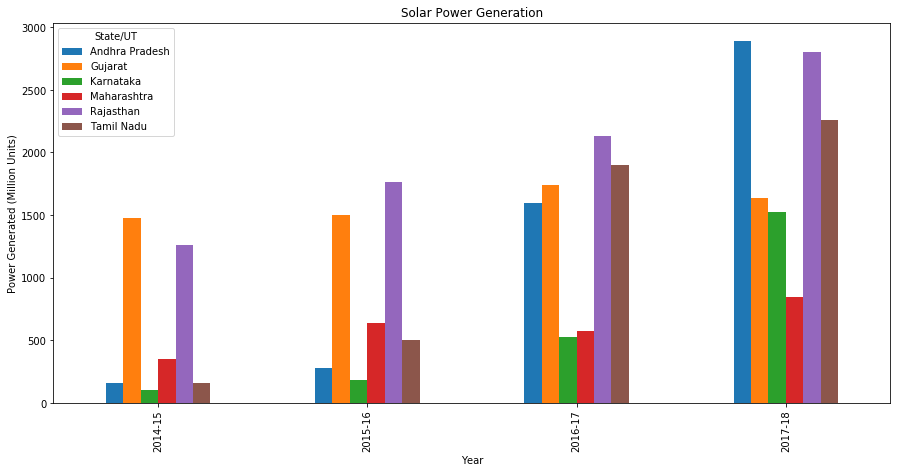

In [11]:
'''
Solar Power Generated by the top 6 states
'''

fig, ax = plt.subplots(figsize=(15,7))
top_states_by_year_grouped_df['Solar'].unstack().plot(ax=ax , kind="bar")
ax.set_xlabel("Year")
ax.set_ylabel("Power Generated (Million Units)")
ax.set_title("Solar Power Generation");

In the above plot we see Solar Power generation has been increasing over the years in all the top states,  **except 1**; **Gujarat** . I was surprised to see that the Solar Power Generation in Gujarat has declined from 2016-17 Fiscal Year to 2017 - 18 Fiscal Year. **Andhra Pradesh** is at the top, closely followed in second place by **Rajasthan**.

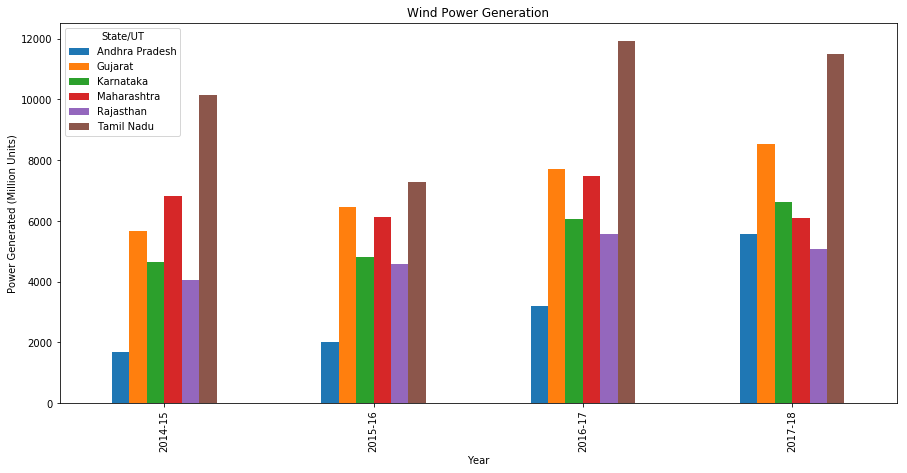

In [12]:
'''
Wind Power Generated by the top 6 states
'''
fig, ax = plt.subplots(figsize=(15,7))
top_states_by_year_grouped_df['Wind'].unstack().plot(ax=ax , kind="bar")
ax.set_xlabel("Year")
ax.set_ylabel("Power Generated (Million Units)")
ax.set_title("Wind Power Generation");

In the above plot we see Wind Power generation has been increasing over the years in most of the top 6 states. The exceptions are Maharashtra and Rajasthan. Incase of Rajasthan the decline is not much.
**Tamil Nadu** is at the top,  followed in second place by **Gujarat**.

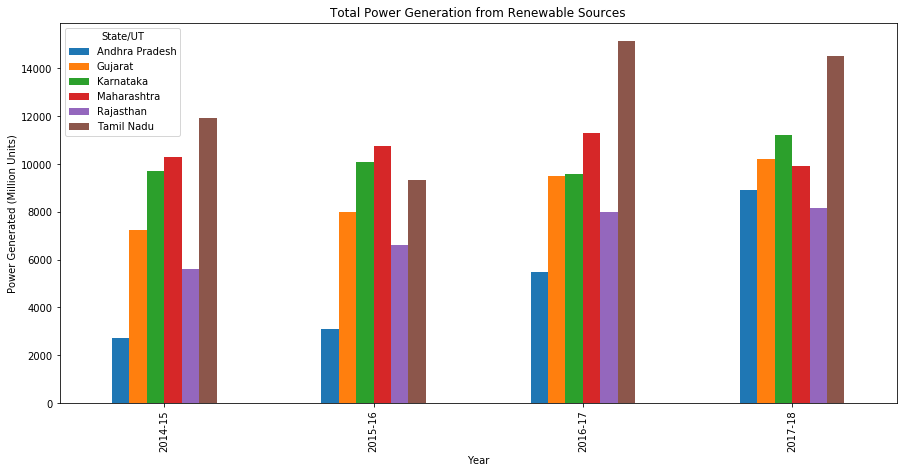

In [13]:
'''
Total Power Generated from Renewable Sources by the top 6 states
'''
fig, ax = plt.subplots(figsize=(15,7))
top_states_by_year_grouped_df['Total'].unstack().plot(ax=ax , kind="bar")
ax.set_xlabel("Year")
ax.set_ylabel("Power Generated (Million Units)")
ax.set_title("Total Power Generation from Renewable Sources");

Now lets look at the Total Power Generated from Renewable Sources. It is evident that **Tamil Nadu** is way ahead of other states. In 2016-17 Fiscal Year Maharashtra was in second place. However Karnataka is in second place in 2017-18 Fiscal Year.
It is also interesting to note that Total Power Generated from Renewable Sources in Tamil Nadu **declined marginally** in the last year. What could be the reason for that??
> **Over all I am very happy that India is investing more in Renewable Sources of power.**